# Write a Python Program for a Histogram Equalization.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [28]:
# Read the image
image_path = "lena_colored.png"  # Replace with image name
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [29]:
def histogram_equalization(image):
    # Compute histogram
    hist, bins = np.histogram(image.flatten(), 256, [0,256])

    # Compute cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Normalize CDF to the range [0, 255]
    cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')

    # Apply histogram equalization
    equalized_image = cdf_normalized[image]

    return equalized_image, hist, cdf_normalized

In [30]:
# Apply histogram equalization
equalized_image, hist_eq, cdf_eq = histogram_equalization(image)

# Compute histogram of original image
hist_original, bins_original = np.histogram(image.flatten(), 256, [0,256])

# Compute PDF of original image
pdf_original = hist_original / np.sum(hist_original)

# Compute CDF of original image
cdf_original = hist_original.cumsum() / np.sum(hist_original)

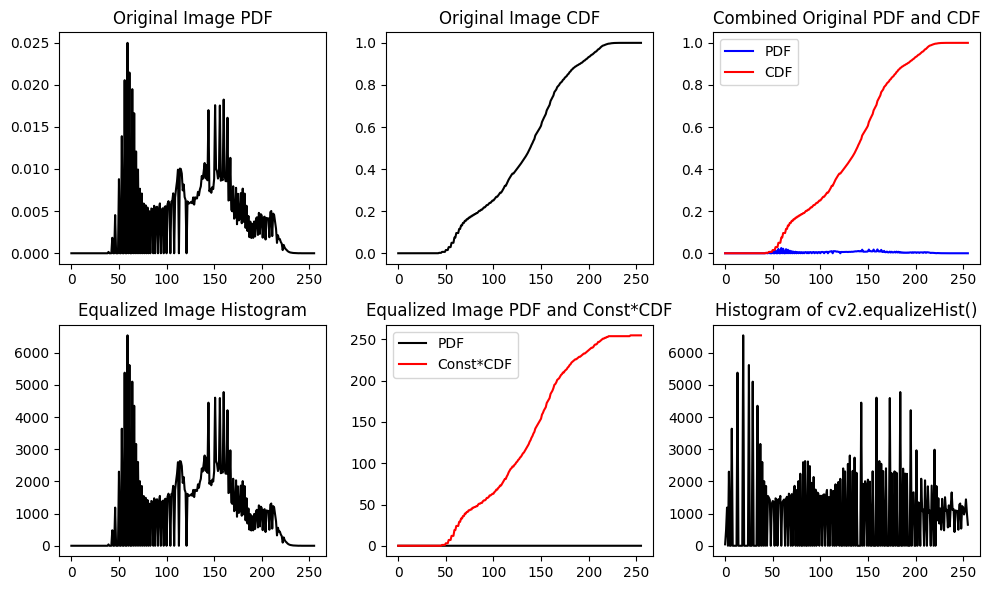

In [38]:
# Plot original PDF and CDF
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.plot(pdf_original, color='black')
plt.title('Original Image PDF')
plt.subplot(2, 3, 2)
plt.plot(cdf_original, color='black')
plt.title('Original Image CDF')

# Plot combined original PDF and CDF
plt.subplot(2, 3, 3)
plt.plot(pdf_original, color='blue', label='PDF')
plt.plot(cdf_original, color='red', label='CDF')
plt.title('Combined Original PDF and CDF')
plt.legend()

# Plot histogram of equalized image
plt.subplot(2, 3, 4)
plt.plot(hist_eq, color='black')
plt.title('Equalized Image Histogram')

# Compute PDF of equalized image
pdf_equalized = hist_eq / np.sum(hist_eq)

# Plot histogram-equalized PDF and const*CDF
plt.subplot(2, 3, 5)
plt.plot(pdf_equalized, color='black', label='PDF')
plt.plot(cdf_eq, color='red', label='Const*CDF')
plt.title('Equalized Image PDF and Const*CDF')
plt.legend()

# Plot histogram of image using cv2.equalizeHist()
plt.subplot(2, 3, 6)
equalized_image_cv2 = cv2.equalizeHist(image)
hist_eq_cv2, _ = np.histogram(equalized_image_cv2.flatten(), 256, [0,256])
plt.plot(hist_eq_cv2, color='black')
plt.title('Histogram of cv2.equalizeHist()')

plt.tight_layout()
plt.show()

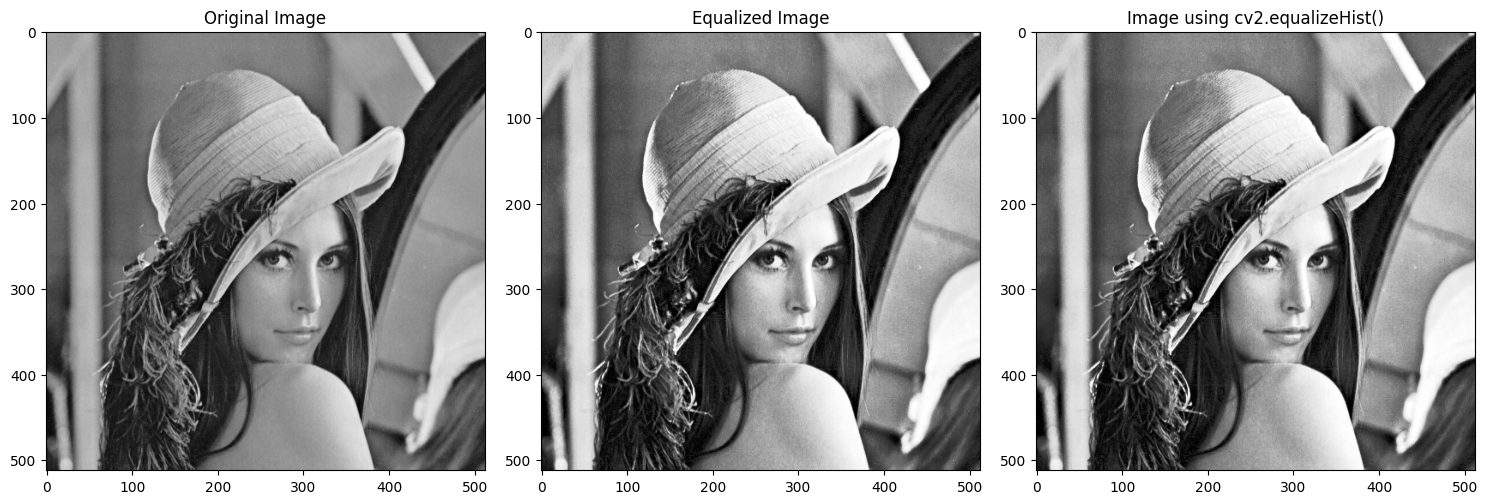

In [40]:
# Display original image, histogram-equalized image, and image using cv2.equalizeHist() separately
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.subplot(1, 3, 3)
plt.imshow(equalized_image_cv2, cmap='gray')
plt.title('Image using cv2.equalizeHist()')

plt.tight_layout()
plt.show()